In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [12]:
regioni= pd.read_csv("dati-regioni/dpc-covid19-ita-regioni.csv")
regioni.head()
regioni["n_giorno"] = regioni["data"].apply(lambda x :(datetime.fromisoformat(x[:10]).timestamp() - datetime.fromisoformat(regioni.data[0][:10]).timestamp())/(86400.0))
regioni.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,n_giorno
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5,0.0
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0.0
2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1,0.0
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1,0.0
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10,0.0


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np

x = itatrend.data
y = itatrend.ricoverati_con_sintomi

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_title('ricoverati_con_sintomi')
# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# use a more precise date string for the x axis locations in the
# toolbar
#ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt

# replicate Data from question in DataFrame
v = [[12,34,51], [9,76,12], [12,23,7], [54,4,34]]
df = pd.DataFrame(v, columns=["01/01/2016","01/07/2016","01/14/2017"], 
                      index=["ABC", "XYZ", "PQR", "DEF"])
print(df)


def scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    fig.autofmt_xdate()

#use column headers as x values
x = pd.to_datetime(itatrend.data, format='%Y-%m-%d %H:%M:S')
# sum all values from DataFrame along vertical axis
y = itatrend.ricoverati_con_sintomi.sum(axis=0)    
scatterplot(x,y, "x_label", "y_label", "title")

plt.show()'''

/home/simone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


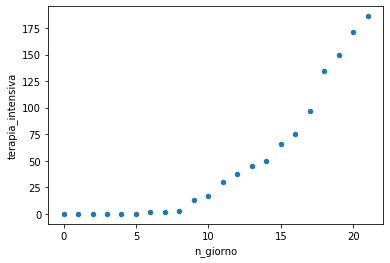

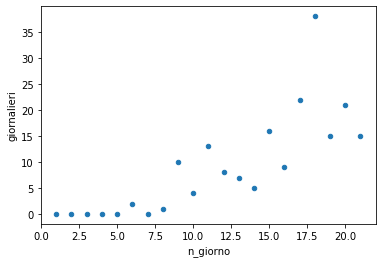

In [67]:
Piemonte = regioni[regioni.denominazione_regione=='Piemonte']

Piemonte['giornalieri']=Piemonte.terapia_intensiva.diff()
ax1 = Piemonte.plot.scatter(x='n_giorno',
                      y='terapia_intensiva')
ax2 = Piemonte.plot.scatter(x='n_giorno',
                      y='giornalieri')

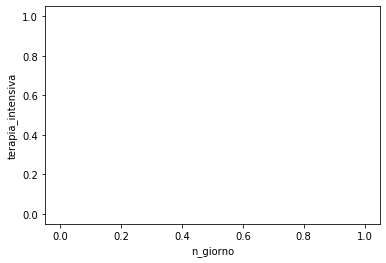

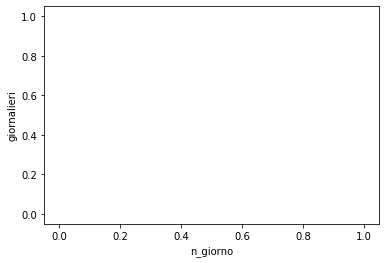

In [73]:
def plot_region(reg):
    reg = regioni[regioni.denominazione_regione=='reg']
    reg['giornalieri']=reg.terapia_intensiva.diff()
    ax1 = reg.plot.scatter(x='n_giorno',
                      y='terapia_intensiva')
    ax2 = reg.plot.scatter(x='n_giorno',
                      y='giornalieri')

plot_region('Piemonte')

In [36]:
regioni["ti_giornaliere"] = regioni["terapia_intensiva"].apply(lambda x :(datetime.fromisoformat(x[:10]).timestamp() - datetime.fromisoformat(regioni.data[0][:10]).timestamp())/(86400.0))


,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,n_giorno
12,2020-02-24 18:00:00,ITA,1,Piemonte,45.073274,7.680687,2,0,2,1,3,3,0,0,3,141,0.0
33,2020-02-25 18:00:00,ITA,1,Piemonte,45.073274,7.680687,2,0,2,1,3,0,0,0,3,141,1.0
54,2020-02-26 18:00:00,ITA,1,Piemonte,45.073274,7.680687,2,0,2,1,3,0,0,0,3,156,2.0
75,2020-02-27 18:00:00,ITA,1,Piemonte,45.073274,7.680687,2,0,2,0,2,-1,0,0,2,156,3.0
96,2020-02-28 18:00:00,ITA,1,Piemonte,45.073274,7.680687,7,0,7,4,11,9,0,0,11,227,4.0


In [ ]:
 ax5 = fig.add_subplot(gs[2:3, 1:])
        total_cases_ITA.plot(x = "n_giorno", y ="totale_casi",  ax = ax5, kind = "scatter", color = "red")
        df_region[df_region.denominazione_regione == data_region.reg_name.iloc[0]].plot(x = "n_giorno", y = "totale_casi", kind = "scatter", ax = ax5)
        df_province[df_province["denominazione_provincia"] == prov_name].plot(x = "n_giorno", y = "totale_casi", kind = "scatter",ax = ax5 , color = "magenta");
        ax5.grid(alpha = 0.3)
        ax5.legend(["Italy", data_region.reg_name.iloc[0], prov_name])
        ax5.set_xlabel("Day")
        ax5.set_ylabel("Confirmed Cases")
        ax5.set_title("Confirmed Cases Comparison",  fontsize = 14)